I got this from BYU ACME

https://acme.byu.edu/00000191-b37d-d592-a1b1-f37db1440001/volume2-2024

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

### More 3-D plots

We saw some 3-D plots in seaborn, but we can do it in matplotlib too and we can do surfaces instead of just heatmaps. We'll start with heatmaps though.

The function np.meshgrid creates a 2-D domain in the Cartesian plane. Given two 1-D coordinate arrays, np.meshgrid creates a corresponding coordinate matrix. For example, if I feed in [0,1,2] and [0,1,2] into np.meshgrid, I get two arrays:
X = [[0, 1, 2],
     [0, 1, 2],
     [0, 1, 2]]
     
and
Y = [[0, 0, 0],
     [1, 1, 1],
     [2, 2, 2]]

We can define a meshgrid and then a function over the meshgrid to create heatmaps and plots.

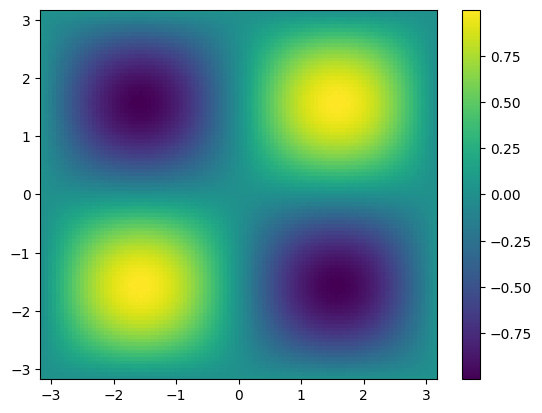

In [3]:
#define the meshgrid from -pi to pi
x = np.linspace(-np.pi, np.pi, 100)
X, Y = np.meshgrid(x, x)

#define Z as sin(x)sin(y)
Z = np.sin(X) * np.sin(Y)  #note the vectorized operations!

#plot a heatmap using pcolormesh. Remember we could also do this with seaborn
plt.pcolormesh(X, Y, Z, cmap = 'viridis')
plt.colorbar()
plt.show()

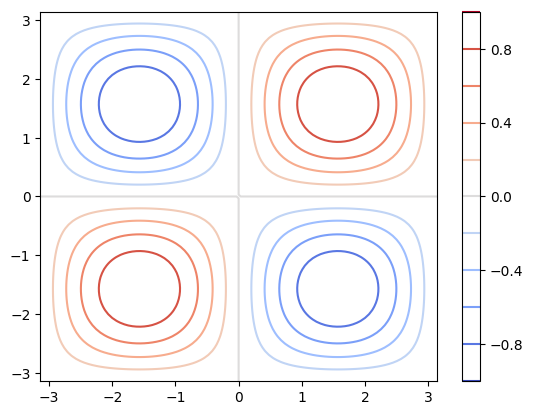

In [4]:
#we can also do a contour plot. This code does a contour plot with 10 level curves
plt.contour(X, Y, Z, 10, cmap = 'coolwarm')
plt.colorbar()
plt.show()

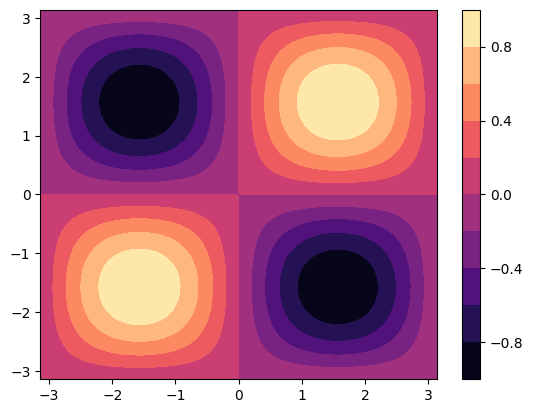

In [5]:
#Or we can do filled contour plots with contourf
plt.contourf(X, Y, Z, 10, cmap = 'magma')
plt.colorbar()
plt.show()

We can also plot 3-D surfaces in matplotlib!

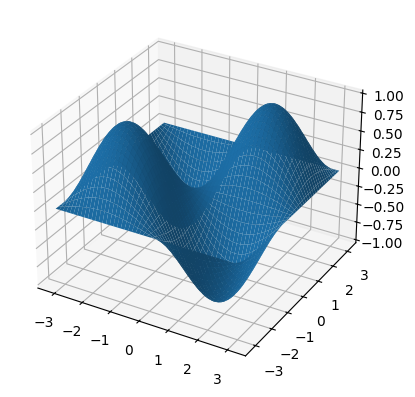

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection = '3d')
ax.plot_surface(X, Y, Z)
plt.show()

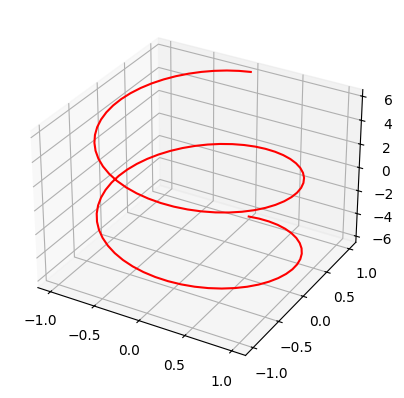

In [23]:
#or we can plot 3-d curves
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = x.copy()
z = x.copy()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.plot(np.sin(x), np.cos(y), z, 'r-')
plt.show()

## Animations

In [37]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import HTML, Image # For GIF

rc('animation', html='html5')

In [42]:
def sine_animation():
  # Calculate the data to be animated.
  x = np.linspace(0, 2*np.pi, 200)[:-1]
  y = np.sin(x)
  # Create a figure and set the window boundaries of the axes.
  fig = plt.figure()
  fig.clear()
  plt.xlim(0, 2*np.pi)
  plt.ylim(-1.2, 1.2)
  # Draw an empty line. The comma after 'drawing' is crucial.
  drawing, = plt.plot([], [])


  # Define a function that updates the line data.
  def update(index):
    drawing.set_data(x[:index], y[:index])
    return drawing, # Note the comma!




  a = FuncAnimation(fig, update, frames=len(x), interval=10)
  return a



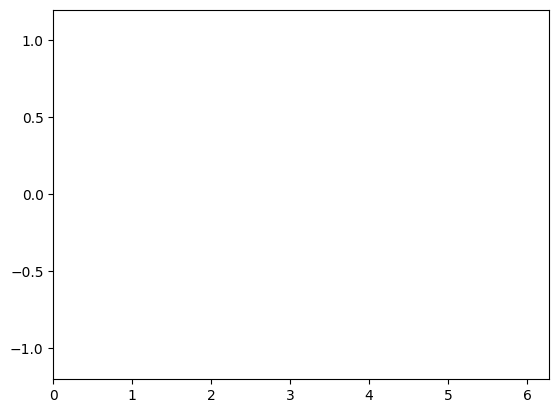

In [43]:
a = sine_animation()
a

I don't know how to get rid of that empty figure at the end, but you could save the gif at least!

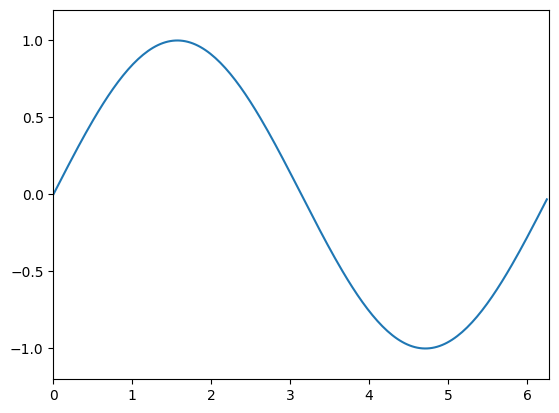

In [46]:
def wave_animation():
  # Calculate the data to be animated.
  x = np.linspace(0, 2*np.pi, 200)[:-1]
  y = np.sin(x)
  # Create a figure and set the window boundaries of the axes.
  fig = plt.figure()
  fig.clear()
  plt.xlim(0, 2*np.pi)
  plt.ylim(-1.2, 1.2)
  # Draw an empty line. The comma after 'drawing' is crucial.
  drawing, = plt.plot([], [])


  # Define a function that updates the line data.
  def wave(index):
    drawing.set_data(x, np.roll(y, index))
    return drawing,




  a = FuncAnimation(fig, wave, frames=len(x), interval=10)
  return a

a = wave_animation()
a

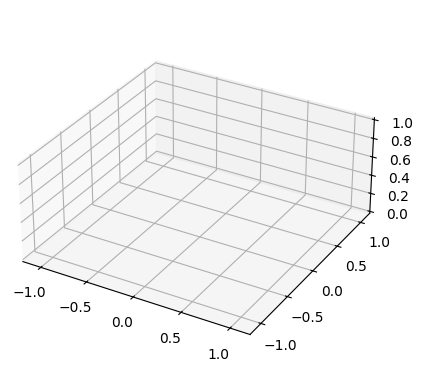

In [47]:
def rose_animation_3D():
  theta = np.linspace(0, 2*np.pi, 200)
  x = np.cos(theta) * np.cos(6*theta)
  y = np.sin(theta) * np.cos(6*theta)
  z = theta / 10
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d') # Make the figure 3-D.
  ax.set_xlim3d(-1.2, 1.2) # Use ax instead of plt.
  ax.set_ylim3d(-1.2, 1.2)
  ax.set_aspect("equal")
  drawing, = ax.plot([], [], []) # Provide 3 empty lists.
  # Update the first 2 dimensions like usual, then update the 3-D component.
  def update(index):
    drawing.set_data(x[:index], y[:index])
    drawing.set_3d_properties(z[:index])
    return drawing,
  a = FuncAnimation(fig, update, frames=len(x), interval=10, repeat=False)

  return a

a = rose_animation_3D()
a